In [14]:
import subprocess
import pandas as pd
import os
import glob
from tqdm import tqdm
from os.path import basename as bn, join, split as sp
import parselmouth
import numpy as np
from parselmouth.praat import call
from scipy.io.wavfile import write
import praat_formants_python as pfp
import librosa
import matplotlib.pyplot as plt

In [4]:
# Write paths
ALL_EXP_FOLDER = "./exports/"
(lambda fp : os.mkdir(fp) if not os.path.exists(fp) else 0)(ALL_EXP_FOLDER) #make export folder

# Vowel subset Export CSV filename
SYNTH_VOWEL_FORMANT_ESTIMATION_IMP_FILENAME = "e_synth-vowels_formant_estimation_vowlimLIM.csv"
SYNTH_VOWEL_FORMANT_ESTIMATION_IMP_FILEPATH = join(ALL_EXP_FOLDER, SYNTH_VOWEL_FORMANT_ESTIMATION_IMP_FILENAME)

In [15]:
VOWEL_LIMIT = 500
SYNTH_VOWELS_FORMANT_DF = pd.read_csv(SYNTH_VOWEL_FORMANT_ESTIMATION_IMP_FILEPATH.replace("LIM", f"{VOWEL_LIMIT}"))
SYNTH_VOWELS_FORMANT_DF

,index,person_id,sex,duration_second,vowel_name,pitch_mean_praat_base,F1_mean_praat_base,F2_mean_praat_base,F3_mean_praat_base,F1_median_praat_base,...,F1_mean_synthvow_praat,F2_mean_synthvow_praat,F3_mean_synthvow_praat,F1_median_synthvow_praat,F2_median_synthvow_praat,F3_median_synthvow_praat,F1_mean_synthvow_deepformant,F2_mean_synthvow_deepformant,F3_mean_synthvow_deepformant,F4_mean_synthvow_deepformant
0,0,MMDM2,M,0.095000,iy,93.30,423.78,1792.19,2124.79,400.73,...,422.01,920.65,1824.37,422.80,862.17,1791.59,433.85,1692.33,2296.37,3915.68
1,1,MWJG0,M,0.135750,iy,92.23,331.04,2084.30,2817.60,326.05,...,322.72,866.20,2080.99,323.42,869.29,2078.89,411.69,1801.86,2579.00,3966.81
2,2,MMEB0,M,0.155938,iy,128.79,376.17,2157.42,2572.08,378.88,...,381.44,957.59,2156.52,381.48,960.07,2157.19,415.27,1812.18,2543.91,3943.56
3,3,MDLR1,M,0.215562,iy,119.88,451.73,2158.56,2721.53,466.94,...,453.91,864.70,2155.80,453.40,865.55,2152.49,462.87,1842.77,2579.50,3871.68
4,4,MCTT0,M,0.152312,iy,143.62,378.22,2125.59,2932.89,380.77,...,392.87,833.71,2127.41,392.78,848.25,2128.51,432.12,1821.23,2633.20,3956.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15372,15372,MSFV0,M,0.174937,ax-h,99.52,765.19,1876.51,3195.29,600.50,...,762.64,880.89,1883.16,764.86,883.93,1885.10,637.70,1861.07,2884.73,4016.78
15373,15373,MJEE0,M,0.141000,ax-h,113.59,818.58,2064.01,3234.50,414.79,...,802.58,959.84,2057.65,802.54,962.03,2057.27,670.65,1961.15,2942.75,4048.69
15374,15374,MTMR0,M,0.129938,ax-h,97.79,917.57,2128.07,3541.92,1219.34,...,893.13,949.74,2127.41,903.31,937.08,2126.14,621.06,1777.72,2651.96,3838.63
15375,15375,MRJM3,M,0.099812,ax-h,112.14,488.53,2069.92,2919.50,510.21,...,471.49,922.49,2066.77,470.89,929.66,2067.76,480.30,1839.46,2674.24,3949.88


16000

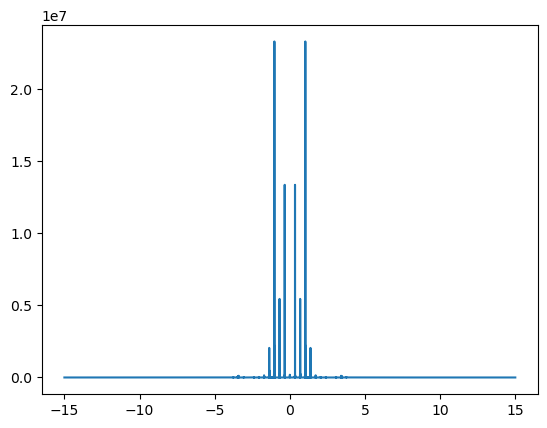

In [16]:
syvinfo = SYNTH_VOWELS_FORMANT_DF.loc[np.random.randint(0, len(SYNTH_VOWELS_FORMANT_DF))]
syvinfo

samples, fs = librosa.load(syvinfo["synth_vowel_path"], sr=None)

ps = np.abs(np.fft.fft(samples))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(samples.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

In [25]:
from ThinkDSP.code.thinkdsp import read_wave
syvinfo = SYNTH_VOWELS_FORMANT_DF.loc[np.random.randint(0, len(SYNTH_VOWELS_FORMANT_DF))]
syvinfo

index                                                                        2039
person_id                                                                   MGAW0
sex                                                                             M
duration_second                                                           0.09575
vowel_name                                                                     er
pitch_mean_praat_base                                                      129.42
F1_mean_praat_base                                                         627.91
F2_mean_praat_base                                                        1511.77
F3_mean_praat_base                                                        1782.36
F1_median_praat_base                                                       624.15
F2_median_praat_base                                                      1468.98
F3_median_praat_base                                                      1779.37
synth_vowel_path

In [68]:
from ThinkDSP.code.thinkdsp import read_wave
filt = SYNTH_VOWELS_FORMANT_DF["synth_vowel_path"].str.contains("aa_3184_MRLJ1_M_123.wav")
syvinfo = SYNTH_VOWELS_FORMANT_DF[filt].iloc[0]
syvinfo

KeyError: 0

In [67]:

wave = read_wave(syvinfo["synth_vowel_path"])

wave.make_spectrum().plot(color="red")
plt.stem([syvinfo["pitch_mean_praat_base"], syvinfo["F1_mean_praat_base"], syvinfo["F2_mean_praat_base"]], [4000] * 3)


AttributeError: 'Series' object has no attribute 'read'

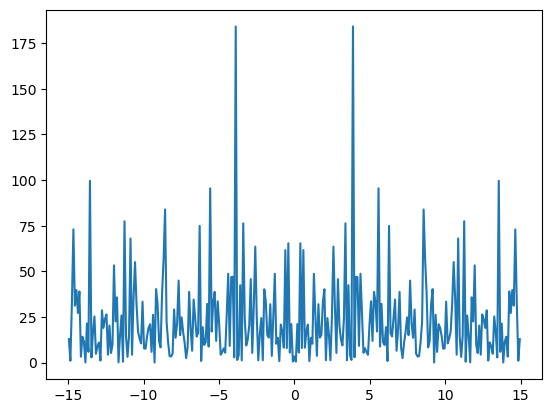

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])